In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd

In [3]:
import datetime as dt

In [4]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [5]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [6]:
# Create a variable named base to store the automap object. Then use the prepare command to gather the data from the database.
Base = automap_base()
Base.prepare(engine, reflect=True)


In [7]:
#3.	View the tables within the database. 
Base.classes.keys()

['measurement', 'station']

In [8]:
#create two variables, called reflecting the database
measurement = Base.classes.measurement
station = Base.classes.station


In [9]:
station.__table__

Table('station', MetaData(bind=None), Column('id', INTEGER(), table=<station>, primary_key=True, nullable=False), Column('station', TEXT(), table=<station>), Column('name', TEXT(), table=<station>), Column('latitude', FLOAT(), table=<station>), Column('longitude', FLOAT(), table=<station>), Column('elevation', FLOAT(), table=<station>), schema=None)

In [10]:
#sqllite imports dates as text
measurement.__table__

Table('measurement', MetaData(bind=None), Column('id', INTEGER(), table=<measurement>, primary_key=True, nullable=False), Column('station', TEXT(), table=<measurement>), Column('date', TEXT(), table=<measurement>), Column('prcp', FLOAT(), table=<measurement>), Column('tobs', FLOAT(), table=<measurement>), schema=None)

#organize by date to Design a query to retrieve the last 12 months of precipitation data.


In [11]:
# Create our session (link) from Python to the DB
#	Create a Session to the database
#Sessions allow us run multiple commands against a database without having to reconnect every time. 
session = Session(engine)


In [15]:
#session.query to get first date in database
session.query(measurement.date).order_by(measurement.date).first()
session.query(measurement.date).order_by(measurement.date.desc()).first()


('2017-08-23')

In [17]:
#pull the last 12 months of data
date = dt.datetime(2016,8,23)
lastyear = session.query(station.name, measurement.date, measurement.prcp).\
filter(measurement.date > date, measurement.station==station.station).\
order_by(measurement.date).all()

In [18]:
lastyeardf = pd.DataFrame(lastyear, columns=["station", "date", "prcp"])
lastyeardf

,station,date,prcp
0,"WAIKIKI 717.2, HI US",2016-08-24,0.08
1,"KANEOHE 838.1, HI US",2016-08-24,2.15
2,"KUALOA RANCH HEADQUARTERS 886.9, HI US",2016-08-24,2.28
3,"PEARL CITY, HI US",2016-08-24,NaN
4,"WAIMANALO EXPERIMENTAL FARM, HI US",2016-08-24,1.22
...,...,...,...
2218,"MANOA LYON ARBO 785.2, HI US",2017-08-22,0.50
2219,"WAIKIKI 717.2, HI US",2017-08-23,0.00
2220,"KUALOA RANCH HEADQUARTERS 886.9, HI US",2017-08-23,0.00
2221,"WAIMANALO EXPERIMENTAL FARM, HI US",2017-08-23,0.08


In [20]:
#beacuse there are over 2000 items we are going to group by month and year to graph fewer data values
monthyear = []
for item in lastyeardf["date"]:
    year = item.split("-")[0]
    month = item.split("-")[1]
    monthyear.append(year+" " + month)
#Adding month year column to the dataframe
lastyeardf["monthyear"] = monthyear
lastyeardf   

,station,date,prcp,monthyear
0,"WAIKIKI 717.2, HI US",2016-08-24,0.08,2016 08
1,"KANEOHE 838.1, HI US",2016-08-24,2.15,2016 08
2,"KUALOA RANCH HEADQUARTERS 886.9, HI US",2016-08-24,2.28,2016 08
3,"PEARL CITY, HI US",2016-08-24,NaN,2016 08
4,"WAIMANALO EXPERIMENTAL FARM, HI US",2016-08-24,1.22,2016 08
...,...,...,...,...
2218,"MANOA LYON ARBO 785.2, HI US",2017-08-22,0.50,2017 08
2219,"WAIKIKI 717.2, HI US",2017-08-23,0.00,2017 08
2220,"KUALOA RANCH HEADQUARTERS 886.9, HI US",2017-08-23,0.00,2017 08
2221,"WAIMANALO EXPERIMENTAL FARM, HI US",2017-08-23,0.08,2017 08


In [21]:
#group the data by month year
monthyeargroup = lastyeardf.groupby(["station", "monthyear"])
#add up prcp for each monthyear
prcpsum = monthyeargroup["prcp"].sum()

prcpsumdf = pd.DataFrame({
    "Total precipitation":prcpsum
})
prcpsumdf

Total Precipitaion
station                            monthyear                    
KANEOHE 838.1, HI US               2016 08                  2.85
                                   2016 09                  3.76
                                   2016 10                  1.08
                                   2016 11                  1.66
                                   2016 12                  4.39
...                                                          ...
WAIMANALO EXPERIMENTAL FARM, HI US 2017 04                 11.09
                                   2017 05                  2.60
                                   2017 06                  0.89
                                   2017 07                  0.51
                                   2017 08                  0.34

[88 rows x 1 columns]

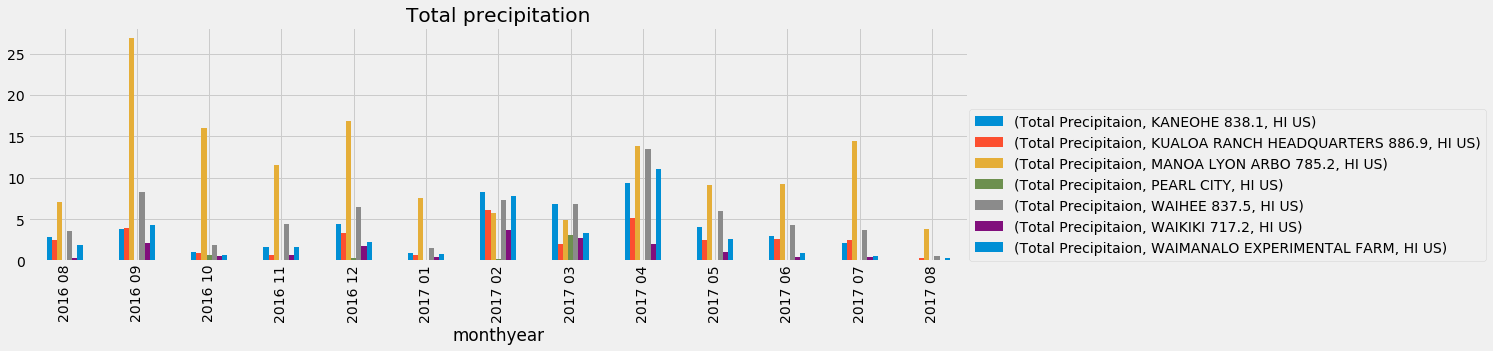

In [24]:
graph = prcpsumdf.unstack(level=0).plot(kind="bar", figsize=(15,4), title="Total precipitation")
graph.legend(loc=(1.001, 0))
plt.show()

In [26]:
monthyeargroup.agg({
    "prcp": ["mean", "median", "var", "std", "sem"]
})

prcp                   \
                                                  mean median       var   
station                            monthyear                              
KANEOHE 838.1, HI US               2016 08    0.356250  0.120  0.529341   
                                   2016 09    0.125333  0.065  0.034777   
                                   2016 10    0.034839  0.020  0.001879   
                                   2016 11    0.055333  0.025  0.007102   
                                   2016 12    0.141613  0.100  0.020087   
...                                                ...    ...       ...   
WAIMANALO EXPERIMENTAL FARM, HI US 2017 04    0.443600  0.000  1.741391   
                                   2017 05    0.089655  0.000  0.040703   
                                   2017 06    0.031786  0.000  0.003897   
                                   2017 07    0.020400  0.000  0.004729   
                                   2017 08    0.020000  0.000  0.001062   

                                                                  
                                                   std       sem  
station                            monthyear                      
KANEOHE 838.1, HI US               2016 08    0.727558  0.257231  
                                   2016 09    0.186487  0.034048  
                                   2016 10    0.043349  0.007786  
                                   2016 11    0.084271  0.015386  
                                   2016 12    0.141730  0.025455  
...                                                ...       ...  
WAIMANALO EXPERIMENTAL FARM, HI US 2017 04    1.319618  0.263924  
                                   2017 05    0.201751  0.037464  
                                   2017 06    0.062423  0.011797  
                                   2017 07    0.068768  0.013754  
                                   2017 08    0.032596  0.007906  

[88 rows x 5 columns]

In [29]:
#Design a query to calculate the total number of stations.
session.query(measurement.station).distinct().count()

9

In [34]:
#Design a query to find the most active stations.
#List the stations and observation counts in descending order.
#create a new variable
#find the station ID with the most rows
stationcount = session.query(measurement.station, station.name, func.count(station.station)).\
filter(measurement.station==station.station).\
group_by(station.station).\
order_by(func.count(station.station).desc()).all()
pd.DataFrame(stationcount, columns=["station ID", "station name", " number of rows"])

,station ID,station name,number of rows
0,USC00519281,"WAIHEE 837.5, HI US",2772
1,USC00519397,"WAIKIKI 717.2, HI US",2724
2,USC00513117,"KANEOHE 838.1, HI US",2709
3,USC00519523,"WAIMANALO EXPERIMENTAL FARM, HI US",2669
4,USC00516128,"MANOA LYON ARBO 785.2, HI US",2612
5,USC00514830,"KUALOA RANCH HEADQUARTERS 886.9, HI US",2202
6,USC00511918,"HONOLULU OBSERVATORY 702.2, HI US",1979
7,USC00517948,"PEARL CITY, HI US",1372
8,USC00518838,"UPPER WAHIAWA 874.3, HI US",511


In [35]:
#USC00519281 You will need to use a function such as `func.min`, `func.max`, `func.avg`, and `func.count` in your queries.
USC00519281 = session.query(station.name, func.min(measurement.tobs),func.max(measurement.tobs), func.avg(measurement.tobs)).\
filter(measurement.station == station.station, station.station=="USC00519281").all()
stationdf= pd.DataFrame(USC00519281, columns = ["station", "low temp", "high temp", "avg temp"])
stationdf

,station,low temp,high temp,avg temp
0,"WAIHEE 837.5, HI US",54.0,85.0,71.663781


In [36]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
session.query(measurement.station, func.count(measurement.tobs)).order_by(func.count(measurement.tobs).desc()).first()


('USC00519397', 19550)

In [38]:
#pull the last 12 months of data
#date = dt.datetime(2016,8,23)
USC00519397_data= session.query(measurement.date, measurement.tobs).\
filter(measurement.station=="USC00519397", measurement.date > date)
USC00519397df = pd.DataFrame(USC00519397_data, columns=["date", "temperature"])

USC00519397df

,date,temperature
0,2016-08-24,79.0
1,2016-08-25,80.0
2,2016-08-26,79.0
3,2016-08-27,77.0
4,2016-08-28,78.0
...,...,...
355,2017-08-19,79.0
356,2017-08-20,81.0
357,2017-08-21,81.0
358,2017-08-22,82.0


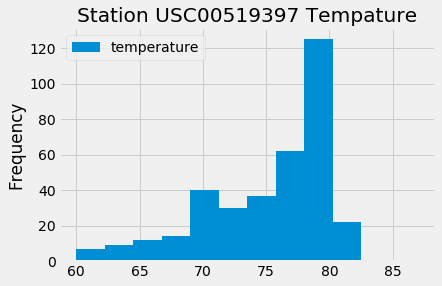

In [41]:
USC00519397df.plot(kind = "hist", bins = 12, title = "Station USC00519397 Tempature")
plt.show()